In [29]:
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', 50)

%matplotlib inline

In [30]:
data = pd.read_csv('data_refined.csv', index_col = 0)
data

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
0,1,1168180,G,C,['not_specified'],1,0,['missense_variant'],MODERATE,B3GALT6,NM_080605.3,0.033481,E,1.0,tolerated,benign,0.321582,1.053,D,0.10020,True,1.000000,2.0
1,1,1470752,G,A,"['Spinocerebellar_ataxia_21', 'not_provided']",1,0,['missense_variant'],MODERATE,TMEM240,NM_001114748.1,0.032646,P,-1.0,deleterious_low_confidence,benign,0.313746,31.000,L,0.00000,True,1.000000,-3.0
2,1,1737942,A,G,"['Strabismus', 'Nystagmus', 'Hypothyroidism', ...",35,1,"['missense_variant', '5_prime_UTR_variant']",MODERATE,GNB1,NM_002074.4,0.015295,I,-1.0,deleterious,probably_damaging,0.410389,28.100,T,0.00000,True,0.500000,-1.0
3,1,2160305,G,A,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,unknown,unknown,0.217631,22.500,S,0.00000,True,0.142857,0.0
4,1,2160305,G,T,"['Shprintzen', 'Goldberg_syndrome']",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,unknown,unknown,0.217631,24.700,C,0.00000,True,0.142857,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,"['Hereditary_factor_VIII_deficiency_disease', ...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.354794,S,-1.0,unknown,unknown,0.001580,0.105,*,0.13923,True,0.538462,NaN
65184,X,154159118,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,1,['missense_variant'],MODERATE,F8,NM_000132.3,0.270573,V,-1.0,tolerated,benign,0.001580,0.002,I,0.00130,True,0.538462,3.0
65185,X,154194886,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.099651,A,-1.0,unknown,unknown,0.001580,12.850,*,0.01110,True,0.307692,NaN
65186,X,154490187,T,C,"['Non', 'syndromic_X', 'linked_intellectual_di...",1,0,['synonymous_variant'],LOW,RAB39B,NM_171998.2,0.049780,T,-1.0,unknown,unknown,0.255614,0.130,*,0.00030,True,1.000000,NaN


Vamos a observar los outliers que puede tener nuestro sistema

In [31]:
categorical_rows = ['CHROM', 'REF', 'ALT', 'ORIGIN', 'IMPACT', 'STRAND', 'SIFT', 'PolyPhen', 'Amino_acids_target', 'Amino_acids', 'IS_EXON', 'BLOSUM']

categorical_counts = []

for row in categorical_rows:
    categorical_counts.append(data[row].value_counts())

categorical_counts    

[2     8127
 17    4949
 11    4352
 1     4136
 16    3636
 19    3561
 5     3382
 7     2658
 12    2555
 9     2524
 13    2392
 3     2349
 10    2120
 6     2003
 14    1860
 8     1747
 X     1744
 15    1591
 4     1134
 22    1040
 18     825
 21     784
 20     716
 Name: CHROM, dtype: int64,
 C    21116
 G    20665
 A     9471
 T     8933
 Name: REF, dtype: int64,
 T    19449
 A    19200
 G    11097
 C    10439
 Name: ALT, dtype: int64,
 1      59078
 33       294
 3        253
 5        168
 17       166
 9        127
 25        17
 49        13
 0         12
 32         9
 513        6
 35         6
 65         5
 2          5
 41         4
 21         3
 13         3
 57         2
 37         2
 4          2
 29         1
 129        1
 12         1
 16         1
 85         1
 27         1
 43         1
 19         1
 11         1
 69         1
 Name: ORIGIN, dtype: int64,
 MODERATE    32281
 LOW         21248
 MODIFIER     3901
 HIGH         2755
 Name: IMPACT, dtype: i

In [32]:
9+6+6+5+5+4+3+3+2+2+2+10, 19

(57, 19)

Podemos eliminar los orígenes con pocos resultados y los aminoácidos objetivo que no tuvieron transcripción

In [33]:
data = data[data["Amino_acids"] != "*"]
data

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
0,1,1168180,G,C,['not_specified'],1,0,['missense_variant'],MODERATE,B3GALT6,NM_080605.3,0.033481,E,1.0,tolerated,benign,0.321582,1.053,D,0.10020,True,1.000000,2.0
1,1,1470752,G,A,"['Spinocerebellar_ataxia_21', 'not_provided']",1,0,['missense_variant'],MODERATE,TMEM240,NM_001114748.1,0.032646,P,-1.0,deleterious_low_confidence,benign,0.313746,31.000,L,0.00000,True,1.000000,-3.0
2,1,1737942,A,G,"['Strabismus', 'Nystagmus', 'Hypothyroidism', ...",35,1,"['missense_variant', '5_prime_UTR_variant']",MODERATE,GNB1,NM_002074.4,0.015295,I,-1.0,deleterious,probably_damaging,0.410389,28.100,T,0.00000,True,0.500000,-1.0
3,1,2160305,G,A,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,unknown,unknown,0.217631,22.500,S,0.00000,True,0.142857,0.0
4,1,2160305,G,T,"['Shprintzen', 'Goldberg_syndrome']",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,unknown,unknown,0.217631,24.700,C,0.00000,True,0.142857,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,"['Hereditary_factor_VIII_deficiency_disease', ...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.354794,S,-1.0,unknown,unknown,0.001580,0.105,*,0.13923,True,0.538462,NaN
65184,X,154159118,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,1,['missense_variant'],MODERATE,F8,NM_000132.3,0.270573,V,-1.0,tolerated,benign,0.001580,0.002,I,0.00130,True,0.538462,3.0
65185,X,154194886,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.099651,A,-1.0,unknown,unknown,0.001580,12.850,*,0.01110,True,0.307692,NaN
65186,X,154490187,T,C,"['Non', 'syndromic_X', 'linked_intellectual_di...",1,0,['synonymous_variant'],LOW,RAB39B,NM_171998.2,0.049780,T,-1.0,unknown,unknown,0.255614,0.130,*,0.00030,True,1.000000,NaN


In [34]:
undesired_origin = [32, 513, 35, 65, 2, 41, 21, 13, 57, 37, 4, 29, 129, 12, 16, 85, 27, 43, 19, 11 , 69]
data = data[~ data["ORIGIN"].isin(undesired_origin)]
data

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
0,1,1168180,G,C,['not_specified'],1,0,['missense_variant'],MODERATE,B3GALT6,NM_080605.3,0.033481,E,1.0,tolerated,benign,0.321582,1.053,D,0.10020,True,1.000000,2.0
1,1,1470752,G,A,"['Spinocerebellar_ataxia_21', 'not_provided']",1,0,['missense_variant'],MODERATE,TMEM240,NM_001114748.1,0.032646,P,-1.0,deleterious_low_confidence,benign,0.313746,31.000,L,0.00000,True,1.000000,-3.0
3,1,2160305,G,A,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,unknown,unknown,0.217631,22.500,S,0.00000,True,0.142857,0.0
4,1,2160305,G,T,"['Shprintzen', 'Goldberg_syndrome']",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,unknown,unknown,0.217631,24.700,C,0.00000,True,0.142857,-3.0
5,1,2160554,G,C,"['Shprintzen', 'Goldberg_syndrome', 'not_provi...",33,0,['missense_variant'],MODERATE,SKI,XM_005244775.1,0.022364,G,1.0,unknown,unknown,0.217631,23.700,R,0.00000,True,0.142857,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,"['Hereditary_factor_VIII_deficiency_disease', ...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.354794,S,-1.0,unknown,unknown,0.001580,0.105,*,0.13923,True,0.538462,NaN
65184,X,154159118,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,1,['missense_variant'],MODERATE,F8,NM_000132.3,0.270573,V,-1.0,tolerated,benign,0.001580,0.002,I,0.00130,True,0.538462,3.0
65185,X,154194886,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.099651,A,-1.0,unknown,unknown,0.001580,12.850,*,0.01110,True,0.307692,NaN
65186,X,154490187,T,C,"['Non', 'syndromic_X', 'linked_intellectual_di...",1,0,['synonymous_variant'],LOW,RAB39B,NM_171998.2,0.049780,T,-1.0,unknown,unknown,0.255614,0.130,*,0.00030,True,1.000000,NaN


Ahora vamos a observar los outliers de las variables contínuas

<AxesSubplot:>

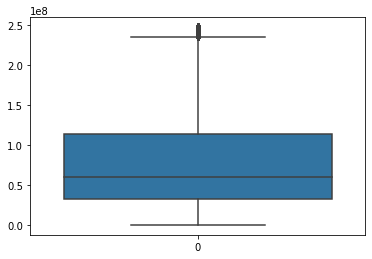

In [35]:
numerical_class = ["POS", "CDS_position", "LoFtool", "CADD_PHRED", "AF", "EXON_INTRON"]

sns.boxplot(data=data["POS"])

<AxesSubplot:>

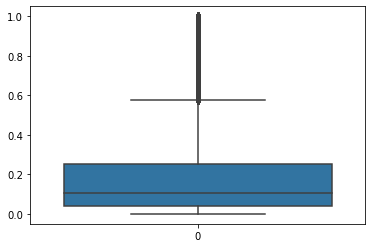

In [36]:
sns.boxplot(data=data["CDS_position"])

<AxesSubplot:>

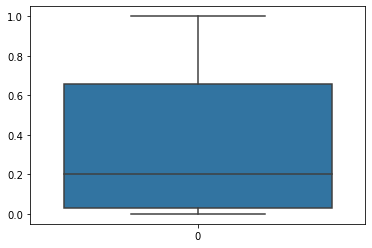

In [37]:
sns.boxplot(data=data["LoFtool"])

<AxesSubplot:>

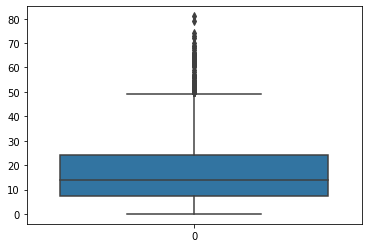

In [38]:
sns.boxplot(data=data["CADD_PHRED"])

<AxesSubplot:>

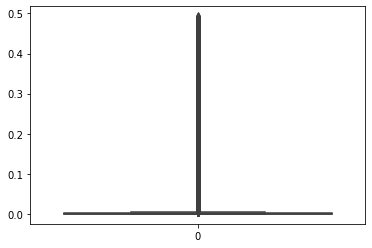

In [39]:
sns.boxplot(data=data["AF"])

<AxesSubplot:>

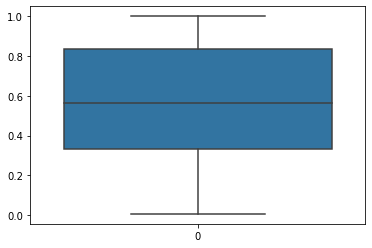

In [40]:
sns.boxplot(data=data["EXON_INTRON"])

Vemos como CDS_position, CADD_PHRED y AF tienen muchos valores en el último cuartil

In [41]:
CDS_third_quartile = data.CDS_position.quantile(0.75) + (data.CDS_position.quantile(0.75) - data.CDS_position.quantile(0.25))*2
CADD_PHRED_third_quartile = data.CADD_PHRED.quantile(0.75) + (data.CADD_PHRED.quantile(0.75) - data.CADD_PHRED.quantile(0.25))*2
AF_third_quartile = data.AF.quantile(0.75) + (data.AF.quantile(0.75) - data.AF.quantile(0.25))*2
CDS_third_quartile, CADD_PHRED_third_quartile, AF_third_quartile

(0.6814759455594313, 57.724000000000004, 0.0054)

In [42]:
data[data["CDS_position"] > CDS_third_quartile]

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
467,1,215799170,T,C,['not_specified'],1,0,['missense_variant'],MODERATE,USH2A,NM_206933.2,1.000000,S,-1.0,unknown,unknown,0.924000,22.700,G,0.01345,True,1.000000,0.0
468,1,215802242,C,T,"['Retinitis_pigmentosa', 'not_specified', 'not...",1,1,['missense_variant'],MODERATE,USH2A,NM_206933.2,0.991710,V,-1.0,unknown,unknown,0.924000,22.600,I,0.00220,True,0.986111,3.0
469,1,215802247,C,T,['not_specified'],1,0,['missense_variant'],MODERATE,USH2A,NM_206933.2,0.991389,R,-1.0,unknown,unknown,0.924000,25.000,H,0.01760,True,0.986111,0.0
470,1,215802248,G,A,['not_specified'],1,0,['missense_variant'],MODERATE,USH2A,NM_206933.2,0.991324,R,-1.0,unknown,unknown,0.924000,25.000,C,0.00078,True,0.986111,-3.0
471,1,215808007,G,A,"['not_specified', 'not_provided']",1,0,['missense_variant'],MODERATE,USH2A,NM_206933.2,0.969732,R,-1.0,unknown,unknown,0.924000,23.000,W,0.01280,True,0.972222,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64991,X,153577800,G,A,"['Melnick', 'Needles_syndrome', 'Frontometaphy...",1,0,['synonymous_variant'],LOW,FLNA,NM_001110556.1,0.705823,A,-1.0,unknown,unknown,0.000896,2.169,*,0.00210,True,0.979167,NaN
64992,X,153577837,G,A,"['Melnick', 'Needles_syndrome', 'Frontometaphy...",1,1,['missense_variant'],MODERATE,FLNA,NM_001110556.1,0.702425,P,-1.0,tolerated,benign,0.000896,1.382,L,0.00006,True,0.979167,-3.0
64993,X,153577858,C,T,"['Melnick', 'Needles_syndrome', 'Frontometaphy...",1,0,['missense_variant'],MODERATE,FLNA,NM_001110556.1,0.700496,C,-1.0,deleterious,benign,0.000896,12.040,Y,0.00000,True,0.979167,-2.0
64995,X,153578063,G,A,['not_specified'],1,0,['synonymous_variant'],LOW,FLNA,NM_001110556.1,0.689291,G,-1.0,unknown,unknown,0.000896,6.693,*,0.00050,True,0.958333,NaN


In [43]:
data[data["CADD_PHRED"] > CADD_PHRED_third_quartile]

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
41517,2,179391915,C,A,['not_specified'],1,0,"['stop_gained', 'nonsense']",HIGH,TTN,NM_001267550.1,0.998509,G,-1.0,unknown,unknown,0.971,81.0,*,0.00000,True,1.000000,NaN
41523,2,179392218,G,A,"['Waddling_gait', 'Myopathy', 'Limb', 'girdle_...",1,1,"['stop_gained', 'nonsense']",HIGH,TTN,NM_001267550.1,0.996980,Q,-1.0,unknown,unknown,0.971,73.0,*,0.00000,True,0.997245,NaN
41573,2,179395588,G,A,"['Limb', 'girdle_muscular_dystrophy', '_type_2...",1,0,"['stop_gained', 'nonsense']",HIGH,TTN,NM_001267550.1,0.979557,R,-1.0,unknown,unknown,0.971,69.0,*,0.00000,True,0.986226,NaN
41585,2,179395857,C,T,"['not_specified', 'not_provided']",1,1,"['stop_gained', 'nonsense']",HIGH,TTN,NM_001267550.1,0.977066,W,-1.0,unknown,unknown,0.971,79.0,*,0.00000,True,0.986226,NaN
41621,2,179396929,G,A,"['Limb', 'girdle_muscular_dystrophy', '_type_2...",1,0,"['stop_gained', 'nonsense']",HIGH,TTN,NM_001267550.1,0.967136,R,-1.0,unknown,unknown,0.971,70.0,*,0.00000,True,0.986226,NaN
41632,2,179397250,G,A,"['Primary_dilated_cardiomyopathy', 'Limb', 'gi...",1,1,"['stop_gained', 'nonsense']",HIGH,TTN,NM_001267550.1,0.964163,R,-1.0,unknown,unknown,0.971,72.0,*,0.00000,True,0.986226,NaN
41713,2,179400887,C,T,"['Dilated_cardiomyopathy_1G', 'not_provided']",1,0,"['stop_gained', 'nonsense']",HIGH,TTN,NM_001267550.1,0.931697,W,-1.0,unknown,unknown,0.971,74.0,*,0.00000,True,0.983471,NaN
41777,2,179404286,G,A,"['Primary_dilated_cardiomyopathy', 'Cardiovasc...",1,0,"['stop_gained', 'nonsense']",HIGH,TTN,NM_001267550.1,0.912421,R,-1.0,unknown,unknown,0.971,69.0,*,0.00000,True,0.969697,NaN
41943,2,179413187,G,A,"['Primary_dilated_cardiomyopathy', 'not_provid...",1,0,"['stop_gained', 'nonsense']",HIGH,TTN,NM_001267550.1,0.862959,R,-1.0,unknown,unknown,0.971,68.0,*,0.00000,True,0.933884,NaN
41965,2,179414036,G,A,"['Limb', 'girdle_muscular_dystrophy', '_type_2...",1,0,"['stop_gained', 'nonsense']",HIGH,TTN,NM_001267550.1,0.855094,R,-1.0,unknown,unknown,0.971,65.0,*,0.00000,True,0.933884,NaN


In [44]:
data[data["AF"] > AF_third_quartile]

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,Amino_acids_target,AF,IS_EXON,EXON_INTRON,BLOSUM
0,1,1168180,G,C,['not_specified'],1,0,['missense_variant'],MODERATE,B3GALT6,NM_080605.3,0.033481,E,1.0,tolerated,benign,0.321582,1.053,D,0.10020,True,1.000000,2.0
7,1,3328659,C,T,['not_specified'],1,0,['missense_variant'],MODERATE,PRDM16,XM_005244772.1,0.122100,P,1.0,unknown,unknown,0.101000,23.000,L,0.13103,True,0.529412,-3.0
13,1,5935102,C,T,"['Nephronophthisis', 'Renal_dysplasia_and_reti...",1,0,['missense_variant'],MODERATE,NPHP4,NM_015102.3,0.184757,R,-1.0,deleterious,benign,0.021000,29.000,Q,0.01120,True,0.700000,1.0
14,1,5940243,G,A,"['Nephronophthisis', 'not_specified']",1,0,['missense_variant'],MODERATE,NPHP4,NM_015102.3,0.163293,R,-1.0,deleterious,probably_damaging,0.021000,25.300,W,0.01531,True,0.633333,-3.0
17,1,5951013,C,T,"['Nephronophthisis', 'Renal_dysplasia_and_reti...",1,0,['missense_variant'],MODERATE,NPHP4,NM_015102.3,0.142536,R,-1.0,tolerated,benign,0.021000,2.552,H,0.02420,True,0.566667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65172,X,153763492,T,C,"['G6PD_A', 'Glucose_6_phosphate_dehydrogenase_...",1,1,['missense_variant'],MODERATE,G6PD,XM_005274657.1,0.042708,N,-1.0,unknown,unknown,0.016900,0.037,D,0.09460,True,0.384615,1.0
65177,X,154004584,C,T,['not_specified'],1,0,"['synonymous_variant', '3_prime_UTR_variant']",LOW,DKC1,NM_001363.3,0.134093,A,1.0,unknown,unknown,0.331921,14.260,*,0.08085,True,0.933333,NaN
65182,X,154157565,C,T,"['not_specified', 'Hemophilia_A', '_FVIII_Defi...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.413207,P,-1.0,unknown,unknown,0.001580,11.440,*,0.01400,True,0.538462,NaN
65183,X,154158201,T,G,"['Hereditary_factor_VIII_deficiency_disease', ...",1,0,['synonymous_variant'],LOW,F8,NM_000132.3,0.354794,S,-1.0,unknown,unknown,0.001580,0.105,*,0.13923,True,0.538462,NaN


<AxesSubplot:>

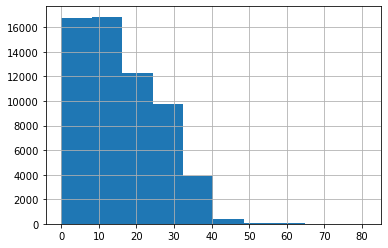

In [46]:
data["CADD_PHRED"].hist()

<AxesSubplot:>

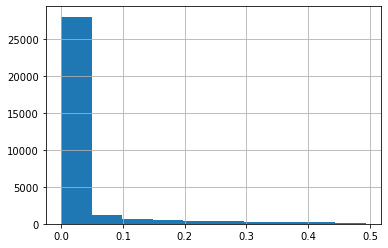

In [47]:
data[data["AF"] != 0]["AF"].hist()

In [48]:
data.describe()

,POS,ORIGIN,CLASS,CDS_position,STRAND,LoFtool,CADD_PHRED,AF,EXON_INTRON,BLOSUM
count,6.010900e+04,60109.000000,60109.000000,52294.000000,60109.000000,60109.000000,60109.000000,60109.000000,60109.000000,32328.000000
mean,7.811630e+07,1.253639,0.254438,0.186650,-0.006904,0.347767,15.606591,0.015543,0.568311,-0.313505
std,6.006359e+07,2.548018,0.435548,0.207553,0.999984,0.351925,10.758778,0.059124,0.295087,1.670878
min,1.387550e+05,0.000000,0.000000,0.000000,-1.000000,0.000069,0.001000,0.000000,0.005510,-3.000000
25%,3.284147e+07,1.000000,0.000000,0.039786,-1.000000,0.029200,7.138000,0.000000,0.333333,-2.000000
50%,5.976083e+07,1.000000,0.000000,0.108201,-1.000000,0.204000,14.070000,0.000030,0.562500,0.000000
75%,1.142846e+08,1.000000,1.000000,0.253683,1.000000,0.656000,24.000000,0.001800,0.833333,1.000000
max,2.476080e+08,49.000000,1.000000,1.000000,1.000000,1.000000,81.000000,0.493100,1.000000,3.000000


Parece que en todos los gráficos la morfología es con cola en el lado derecho, como la cola disminuye en todos los casos no vemos necesario eliminar estos datos

In [49]:
data.to_csv('data_pre_model.csv')